Done:
points 1, 2, 3, 4
<br>
TODO:
5, 6
Live Calibration
Spherical objects

In [1]:
#already imports numpy as np, cv2, matplotlib.pyplot 
#as py, os
from CameraCalibration import *
import drawingHelper as dh

In [2]:
#load all images from folder
imgs = importImagesFolder('../images_calib_custom/')

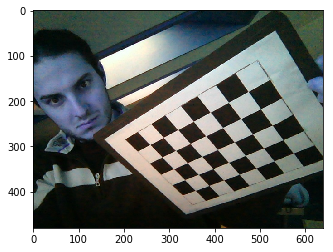

In [3]:
#check if images are loaded correctly
plt.imshow(imgs[4])

In [4]:
#detect checkerboard crossings and store object/image points
checkerboardSize = (7,5)
imgs_check, objpoints, imgpoints, checkerFound = \
    detectAndSaveCheckerboardInList(imgs, checkerboardSize)

In [16]:
_, objpoints, imgpoints, checkerFound = detectAndSaveCheckerboardInList(imgs, checkerboardSize)

In [20]:
objpoints[0].shape

(35, 3)

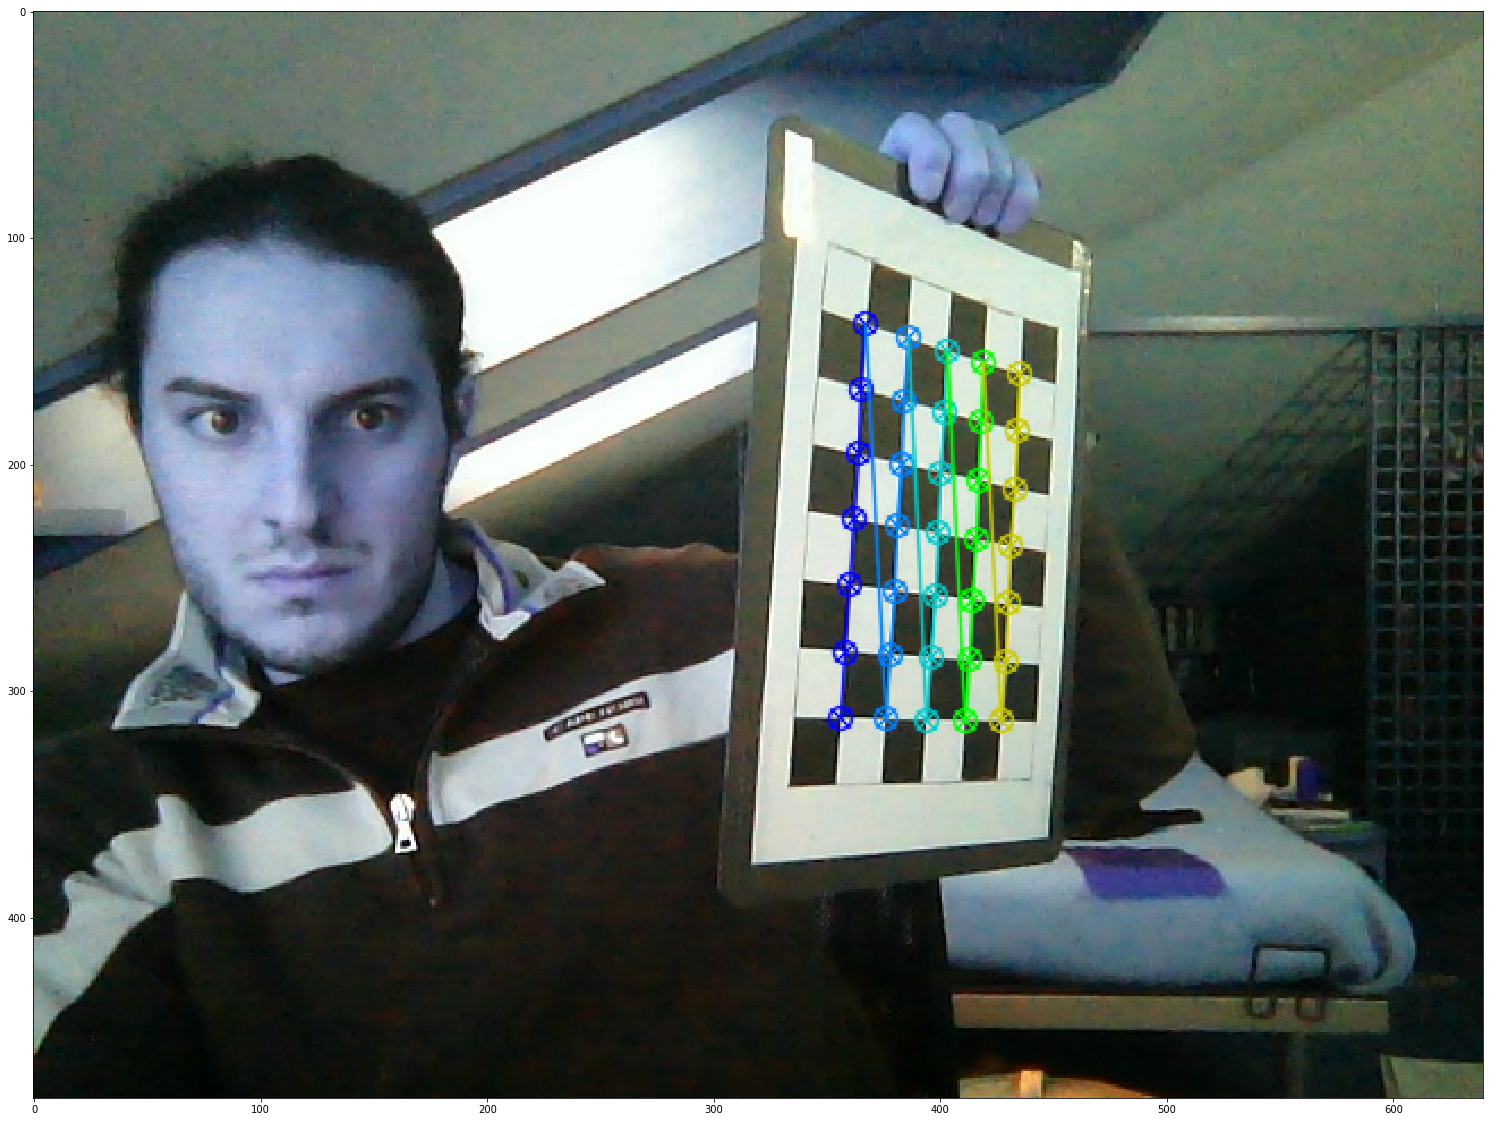

In [5]:
#check if detection worked out correctly
plt.figure(figsize=(50, 20))
plt.imshow(imgs_check[15])

In [6]:
#Calibrate Camera w/o considering radial distortion
ret, mtx, dist, rvecs, tvecs = calibrateCamera(objpoints, imgpoints, imgs_check[0].shape[0:2],
               False)

In [7]:
#check that distortion array is all zeros
dist

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [8]:
#calculate geometric reprojection error based on lecture slides
#(residual sum of squares) for all calibration images
repError, projPoints = computeReprojectionError(imgpoints, objpoints, rvecs,
                        tvecs, mtx, dist)

repError

[2067.2627,
 5569.829,
 3556.1653,
 4980.328,
 4042.4414,
 4808.5376,
 350.2506,
 51975.816,
 2444.0322,
 993.95557,
 232.5602,
 110.01749,
 619.2372,
 1412.6488,
 1732.2998,
 700.8694,
 767.60675]

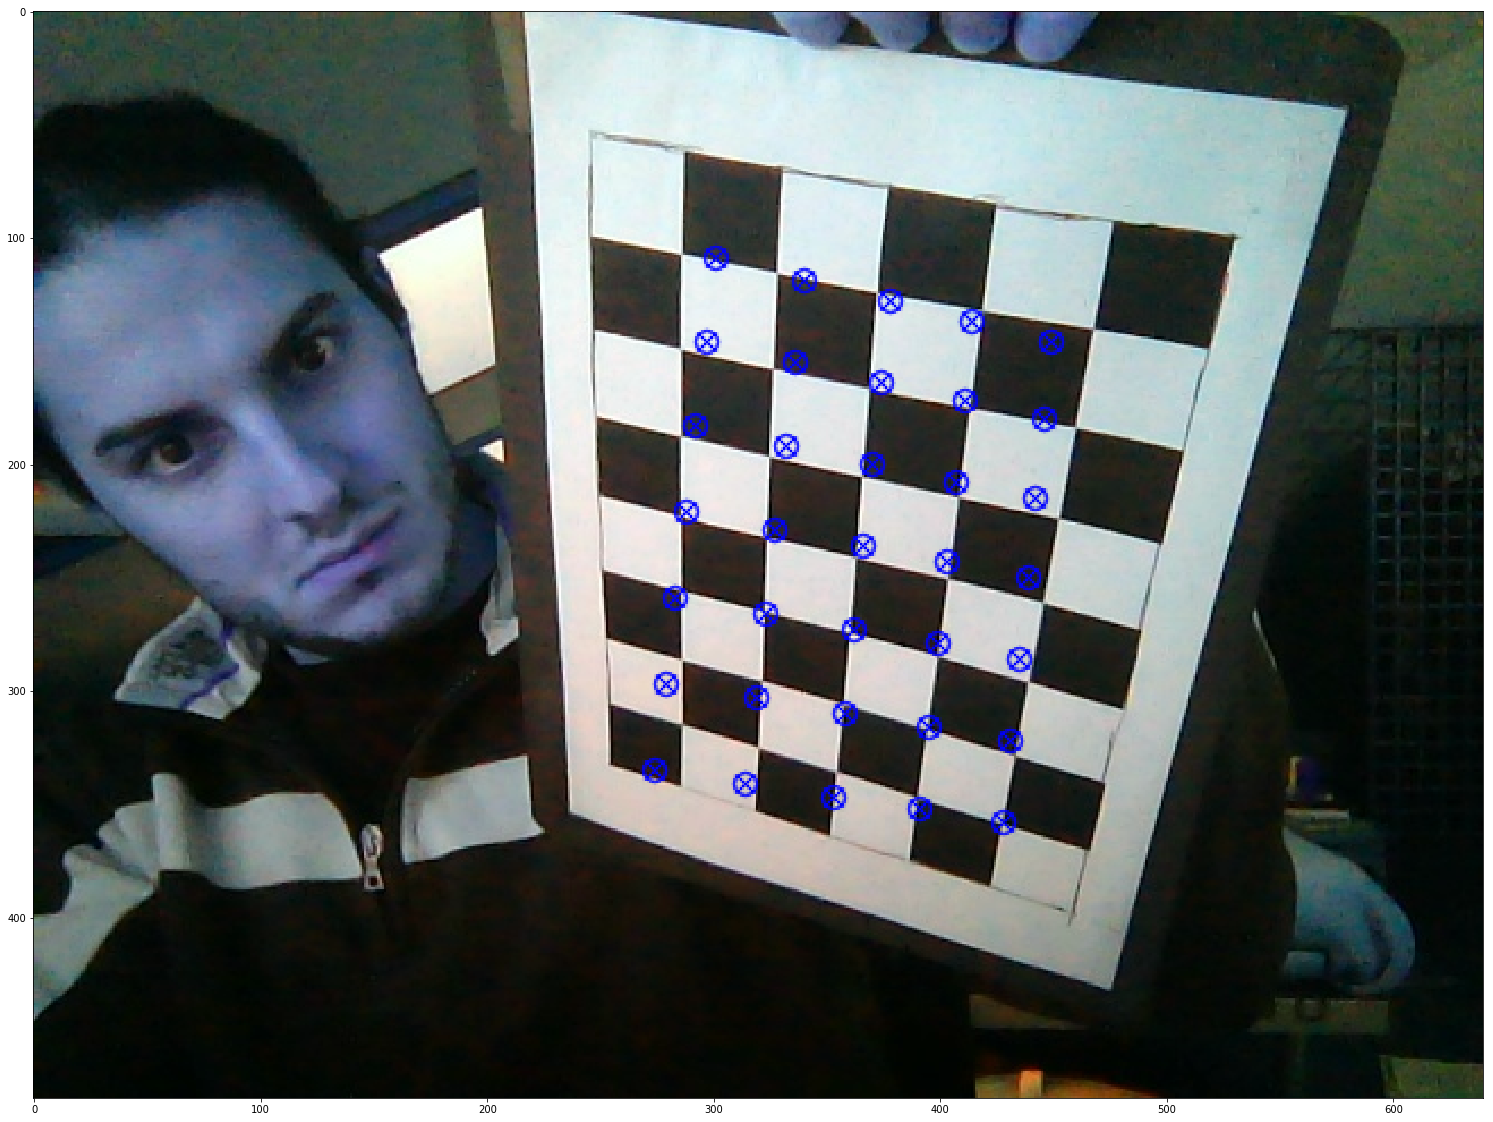

In [9]:
#plot points on image
img_index = 2
if checkerFound[img_index]:
    img2_copy = np.copy(imgs[img_index])
    cv2.drawChessboardCorners(img2_copy, checkerboardSize,
                              projPoints[img_index], False)
    plt.figure(figsize=(50, 20))
    plt.imshow(img2_copy)
else:
    print("The image with index " + str(img_index) + " has no checkerboard detected in it.")

In [10]:
#calibrate camera using cv2 function - this will return a
#slightly different version of distortion coefficients
#than the one seen during lectures: this one considers also
#a third coefficient k3
ret, mtx, dist, rvecs, tvecs = calibrateCamera(
    objpoints, imgpoints, imgs_check[0].shape[0:2], True)

ret

0.45181905534880634

In [11]:
#reprojection error considering radial distortion
repError_dist, projPoints_dist = computeReprojectionError(imgpoints, objpoints, rvecs,
                        tvecs, mtx, dist)

print(repError_dist)

[5.5041075, 3.0158246, 18.795042, 7.847536, 14.561729, 15.982606, 4.087593, 8.071699, 5.4547944, 17.663153, 1.7300286, 4.0499797, 1.8324083, 4.8073645, 3.2698336, 3.194255, 1.5953321]


In [12]:
#percentage variation of reprojection error from calibration
#without and with radial distortion
[(x-y)/y for x,y in zip(repError_dist, repError)]
#we see that in all images we have a drop of above 95%

[-0.99733746,
 -0.99945855,
 -0.99471486,
 -0.9984243,
 -0.9963978,
 -0.99667627,
 -0.9883295,
 -0.99984473,
 -0.9977681,
 -0.9822294,
 -0.992561,
 -0.9631879,
 -0.99704087,
 -0.99659693,
 -0.99811244,
 -0.9954424,
 -0.99792165]

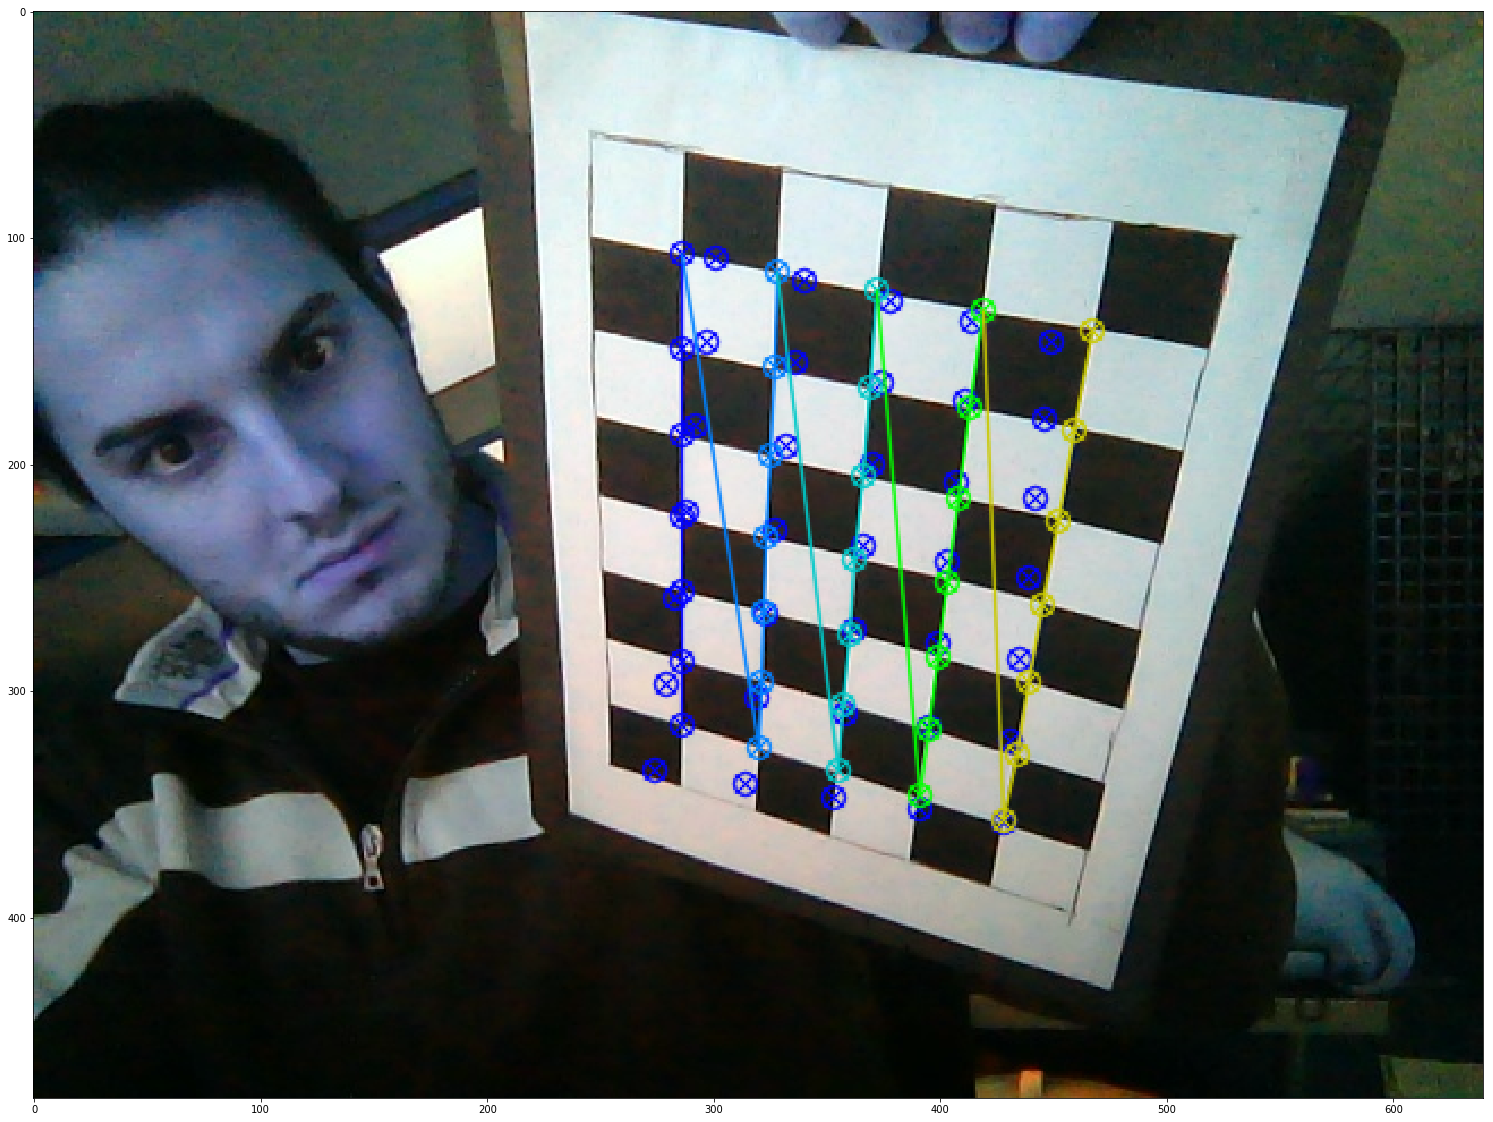

In [13]:
#for comparison sake, before and after on image 3
if checkerFound[img_index]:
    cv2.drawChessboardCorners(img2_copy, checkerboardSize,
                              projPoints_dist[img_index], True)
    plt.figure(figsize=(50, 20))
    plt.imshow(img2_copy)
else:
    print("The image with index " + str(img_index) + " has no checkerboard detected in it.")

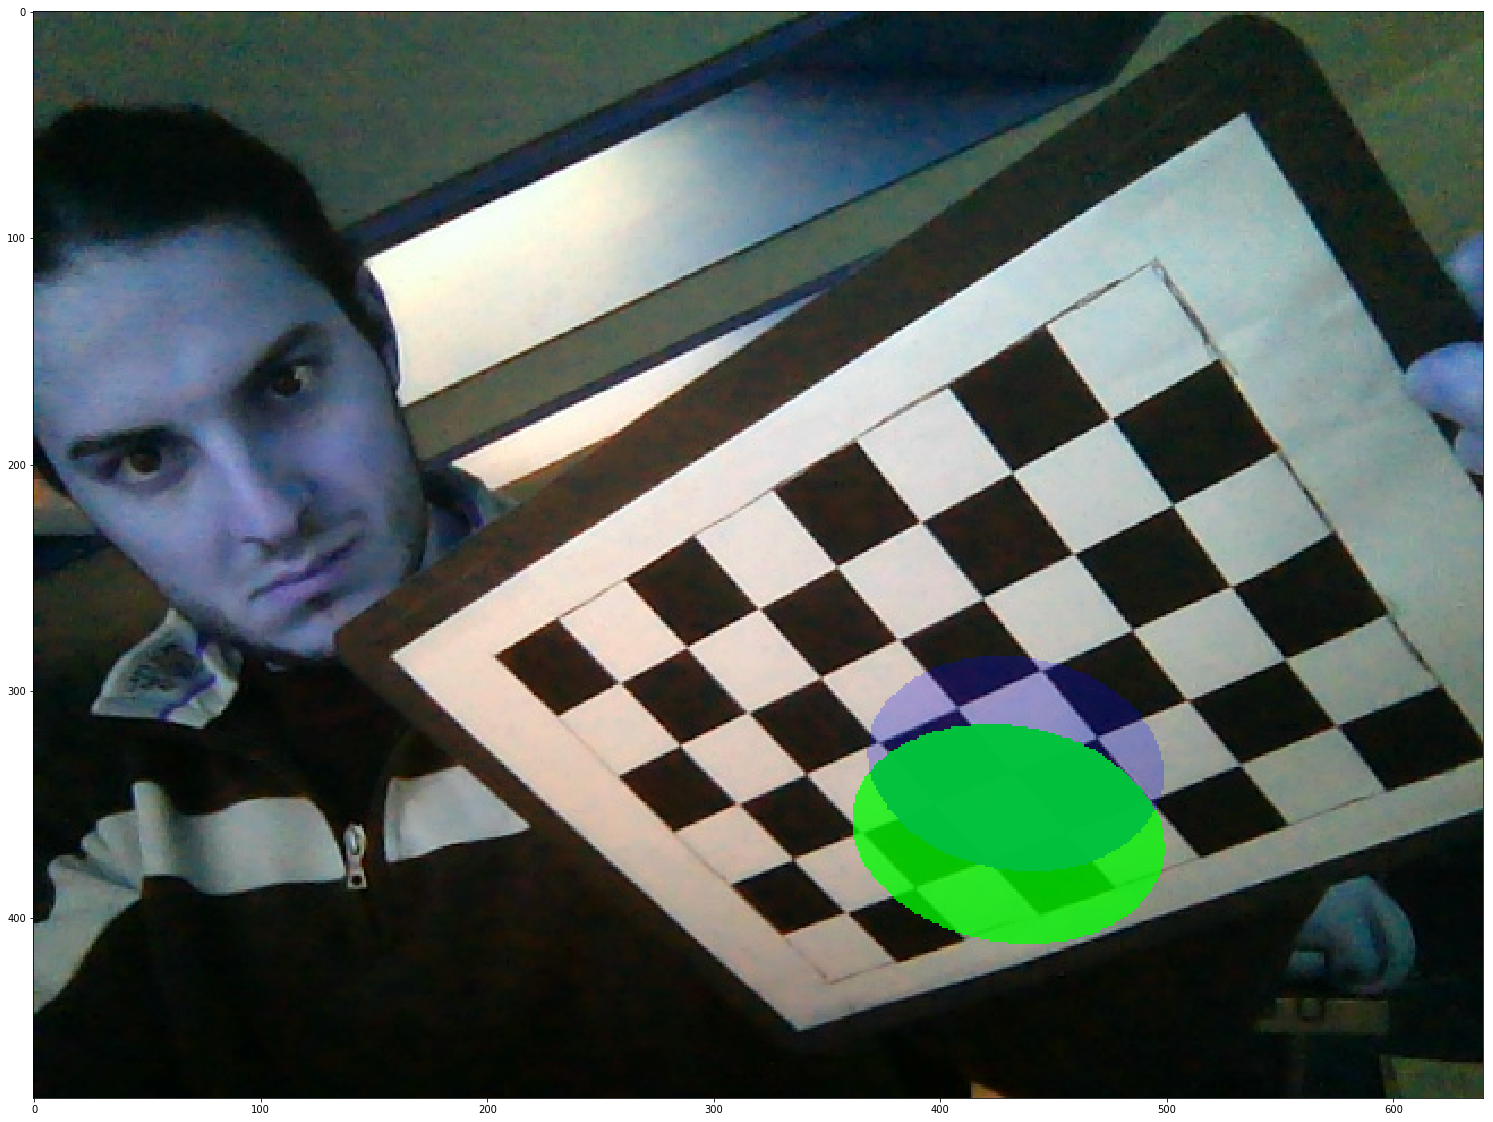

In [14]:
img_ind = 4
if checkerFound[img_ind]:
    img = dh.draw_solid('Cylinder', (1.5,1), (3,3), imgs[img_ind], imgpoints[img_ind], mtx, rvecs[img_ind],
                        tvecs[img_ind], dist)
    plt.figure(figsize=(50, 20))
    imgplot = plt.imshow(img)
else:
    print("Checkerboard pattern not found in image with index " + str(img_ind))